# Assignment 4

What are the score distributions? Which one gives the most good ratings? Whichone is the most difficult to please?

Movies! (CINEMA)
Rotten Tomatoes vs IMDb.
Community vs Critics!
favorite genre, year, director and writer of each community.
Lets compare the movie rating distribution!

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns

In [56]:
moviedb = pd.read_csv("allmovies.csv")
moviedb = moviedb.rename(columns = {"avg_vote": "IMDb", "tomatometer_rating": "RT Critics", "audience_rating": "RT Users"})
moviedb["RT Users"] = moviedb["RT Users"]/10
moviedb["RT Critics"] = moviedb["RT Critics"]/10;
ratings = moviedb[["IMDb", "RT Critics", "RT Users"]].copy()


In [63]:
by_year = moviedb[["IMDb", "RT Critics", "RT Users", "year"]].copy()
all_years = by_year.groupby("year").mean()
past_years = by_year[by_year["year"] < 1980].groupby("year").mean()
late_years = by_year[by_year["year"] >= 1980].groupby("year").mean()

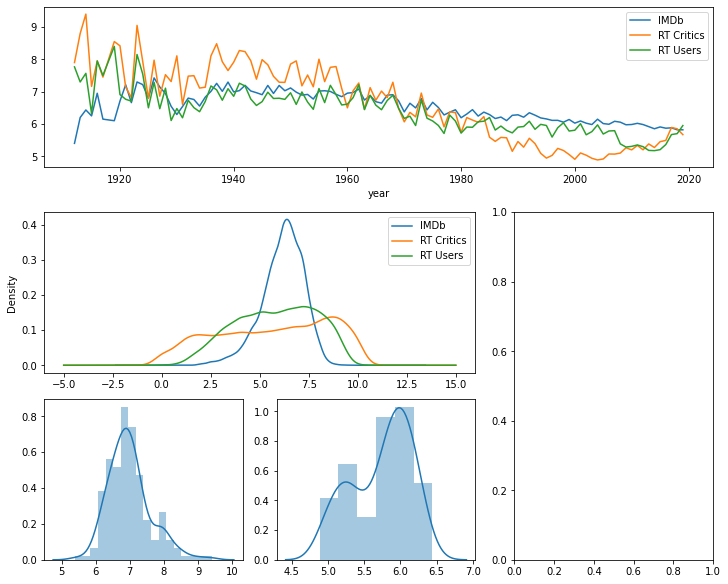

In [65]:
def plot_assignment():
    
    fig = plt.figure(figsize=(10,8),constrained_layout=True)
    gs = fig.add_gridspec(3, 3)
    rating_over_years = fig.add_subplot(gs[0, :])
    rating_kde = fig.add_subplot(gs[1, :-1])
    table = fig.add_subplot(gs[1:, -1])
    past = fig.add_subplot(gs[-1, 0])
    late = fig.add_subplot(gs[-1, -2])
    
    
    #Yearly rating
    all_years.plot(ax=rating_over_years)
    
    #Kernel Density Plot
    ratings.plot.kde(ax=rating_kde)
    
    #cumulative kde before 1980
    sns.distplot(past_years, ax=past)
    #cumulative kde after 1980
    sns.distplot(late_years, ax=late)
    
plot_assignment()